I have been contracted by the bank. they are conducted my campaigns for making the customers to subscribe their product, after the campaigns the customers who have contacted the bank to get subscribtion is very low(to by the the product), this states that their success rate of selling their product to the customers is very low, the bank is asking me whether any machine learning technique is helful for them to make the campagins more efficient. using the given dataset some models are trained and choosing the best model, firstly exploring the data.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data=pd.read_csv("bank-full.csv")

In [103]:
data.head(300)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47,self-employed,married,professional.course,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
296,49,blue-collar,divorced,high.school,no,no,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
297,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
298,35,services,divorced,high.school,no,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [104]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [105]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [106]:
data.shape

(41188, 21)

In [107]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [109]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [110]:
features_with_nan = data.columns[data.isnull().any()].tolist()

if len(features_with_nan) > 0:
    for feature in features_with_nan:
        percentage_missing = data[feature].isnull().mean() * 100
        print(f"{feature}: {percentage_missing:.2f}% missing values")
else:
    print("No missing values found")


No missing values found


This below donut chart shows the percentage of the people says 'no' for the subscription and 'yes' for the subscription.

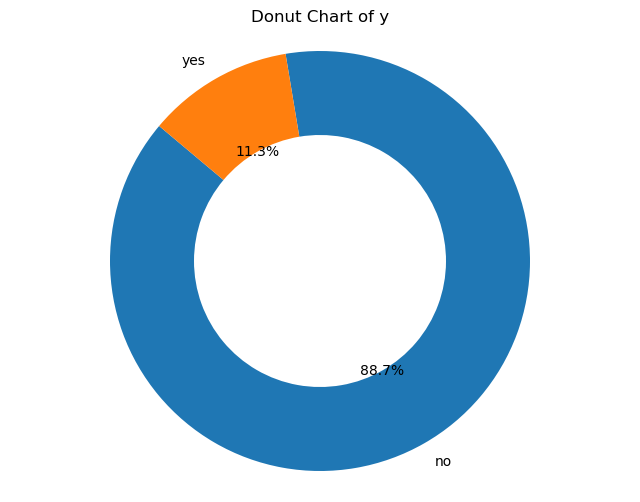

In [111]:
plt.figure(figsize=(8, 6))
counts = data['y'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Donut Chart of y')
plt.axis('equal')
plt.show()


In [112]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [113]:
[print(f"The feature is {feature} and the number of categories are {len(data[feature].unique())}") for feature in categorical_features]


The feature is job and the number of categories are 12
The feature is marital and the number of categories are 4
The feature is education and the number of categories are 8
The feature is default and the number of categories are 3
The feature is housing and the number of categories are 3
The feature is loan and the number of categories are 3
The feature is contact and the number of categories are 2
The feature is month and the number of categories are 10
The feature is day_of_week and the number of categories are 5
The feature is poutcome and the number of categories are 3
The feature is y and the number of categories are 2


[None, None, None, None, None, None, None, None, None, None, None]

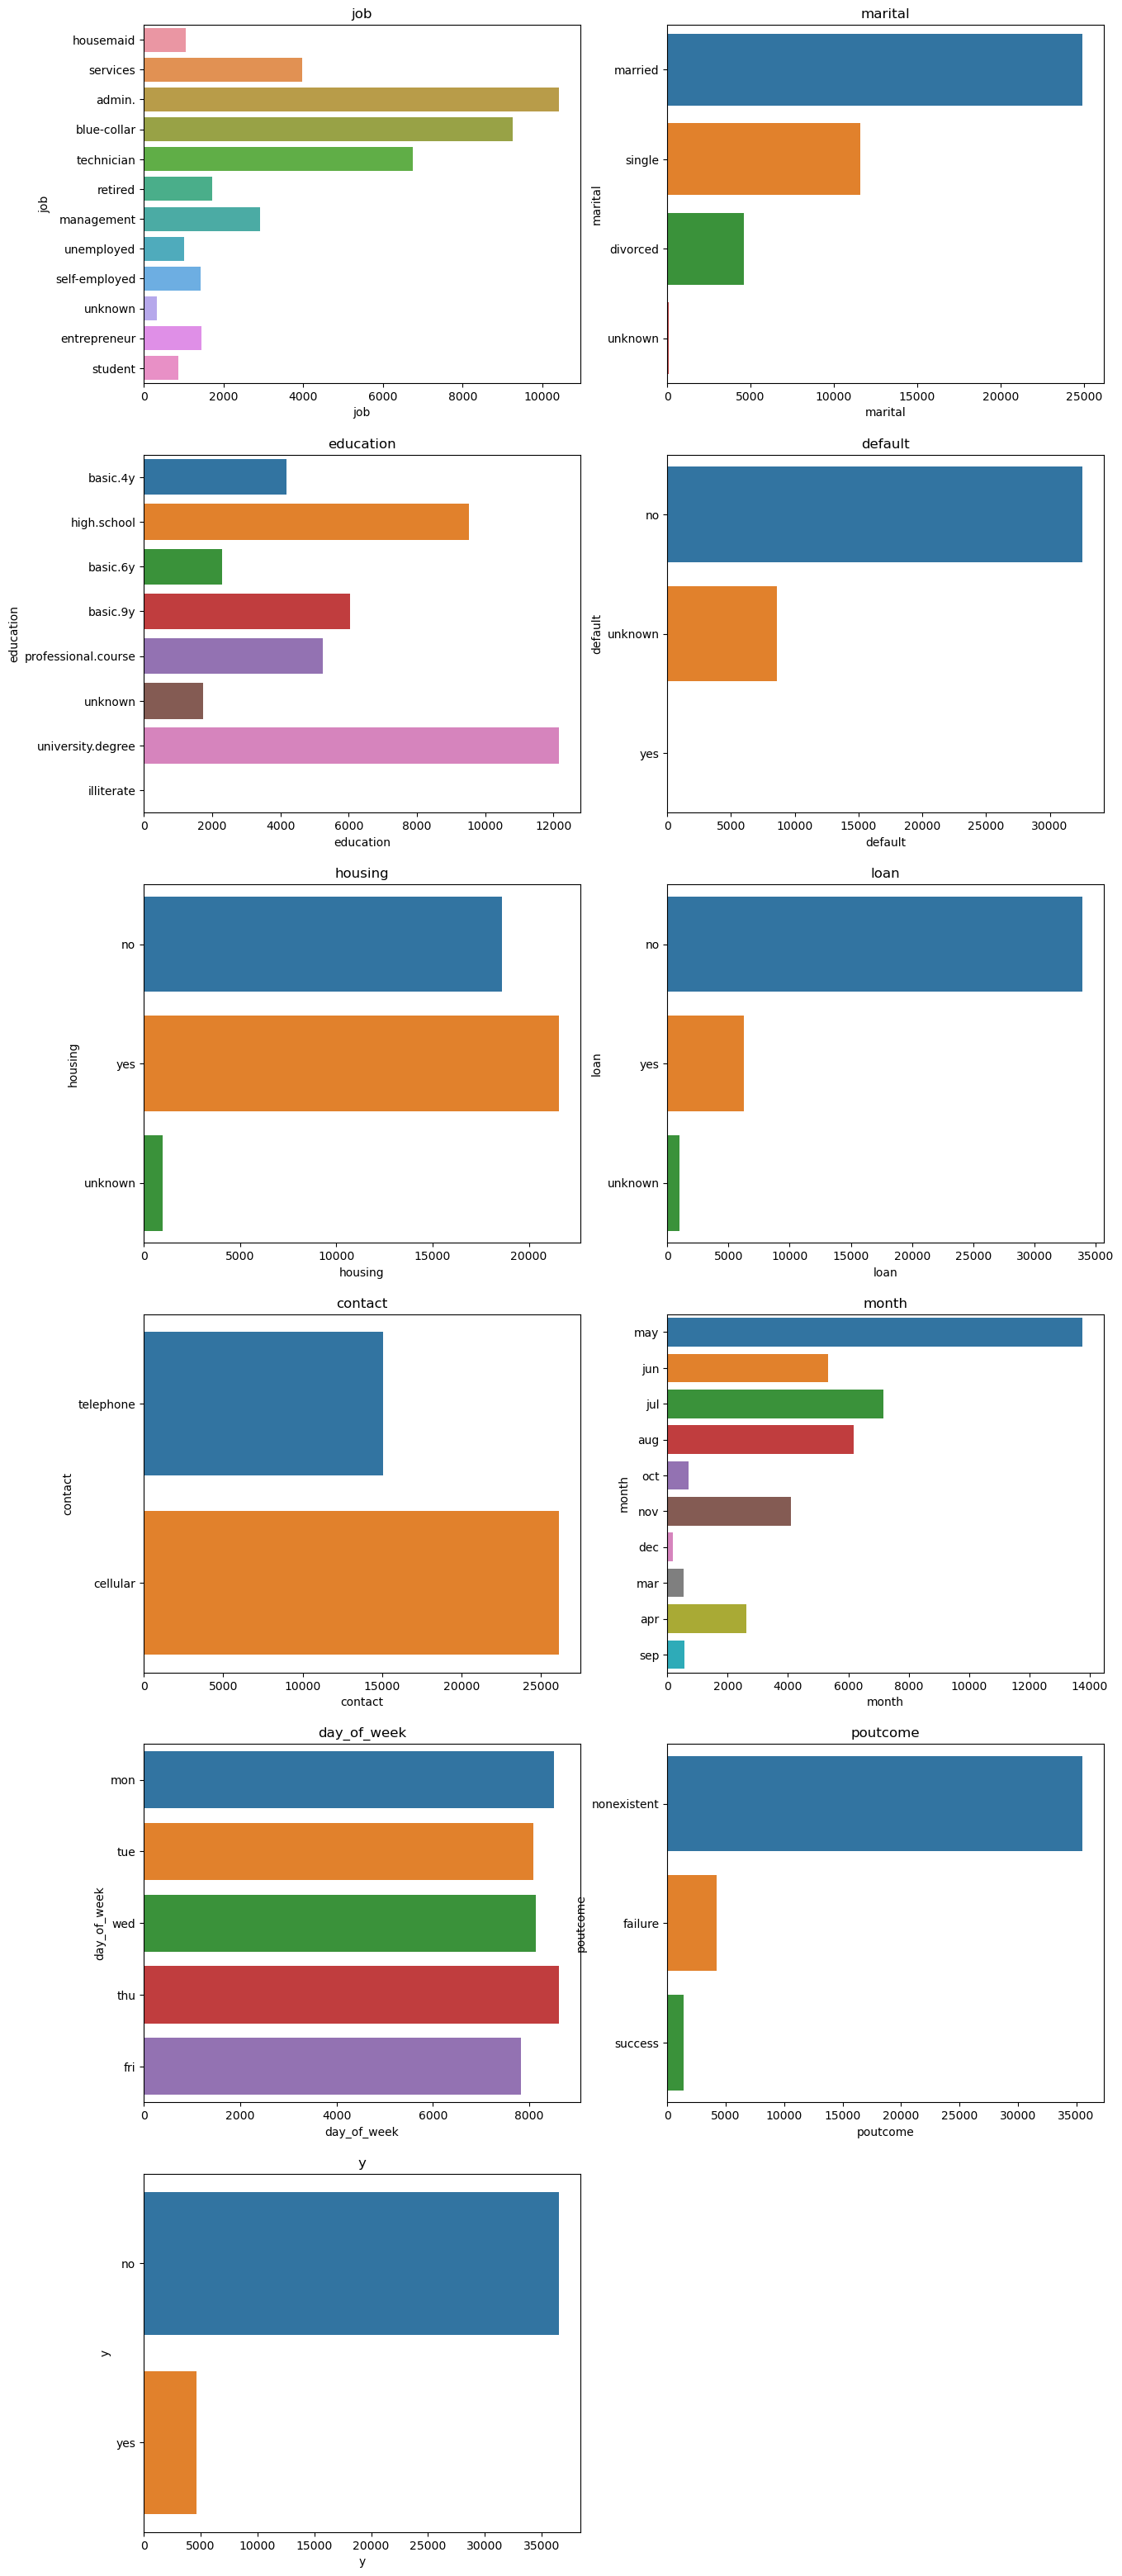

In [114]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

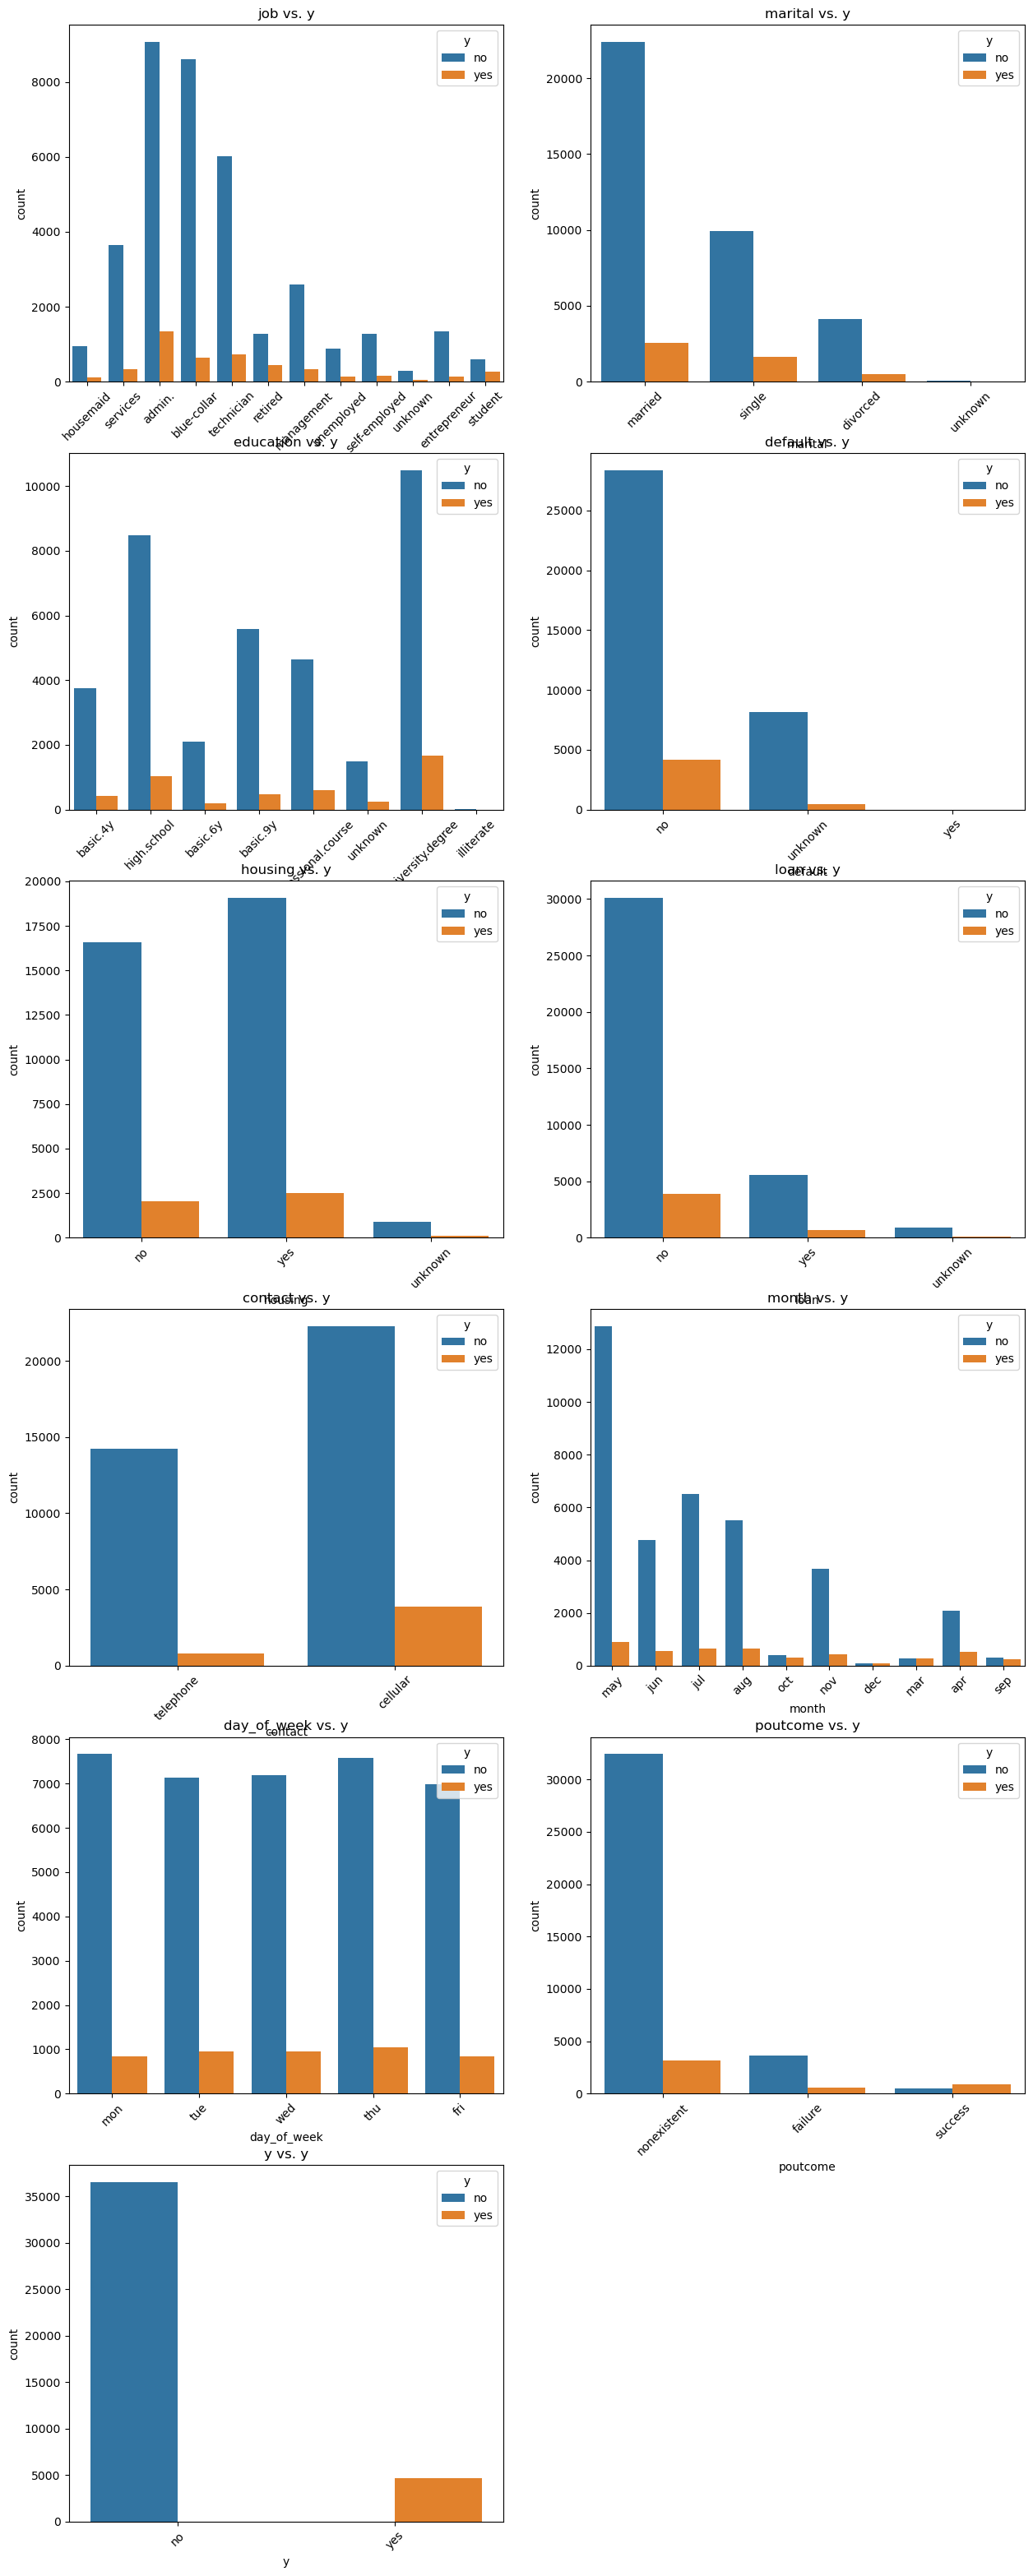

In [115]:
plt.figure(figsize=(15, 80))
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12, 2, plotnumber)
    sns.countplot(x=categorical_feature, hue='y', data=data, ax=ax)
    plt.xlabel(categorical_feature)
    plt.title(f'{categorical_feature} vs. y')
    plt.xticks(rotation=45)
    plotnumber += 1
plt.show()


In [116]:
#List of numerical_variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print("Number of numerical variable",len(numerical_features))
data[numerical_features].head()

Number of numerical variable 10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191


In [117]:
# Identify discrete numerical features with less than 25 unique values
discrete_features = [feature for feature in data.select_dtypes(include='number').columns if data[feature].nunique() < 25]
print("Discrete variables count: {}".format(len(discrete_features)))
print("Discrete variables: ", discrete_features)


Discrete variables count: 3
Discrete variables:  ['previous', 'emp.var.rate', 'nr.employed']


In [118]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 7


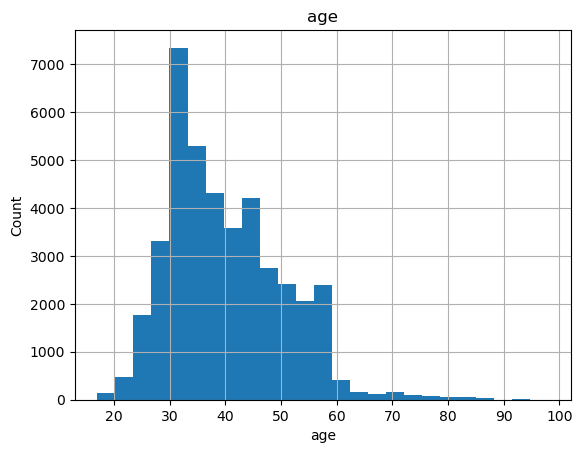

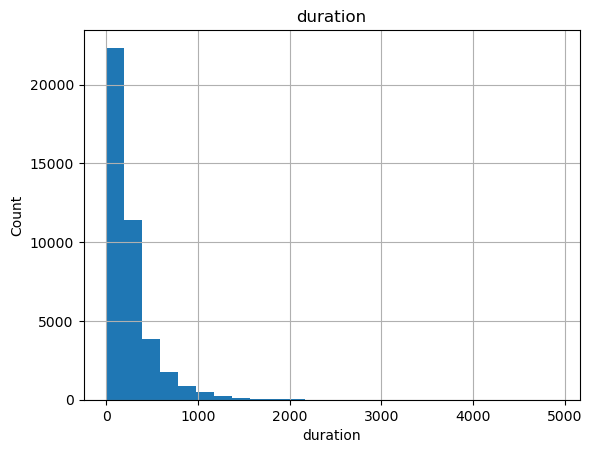

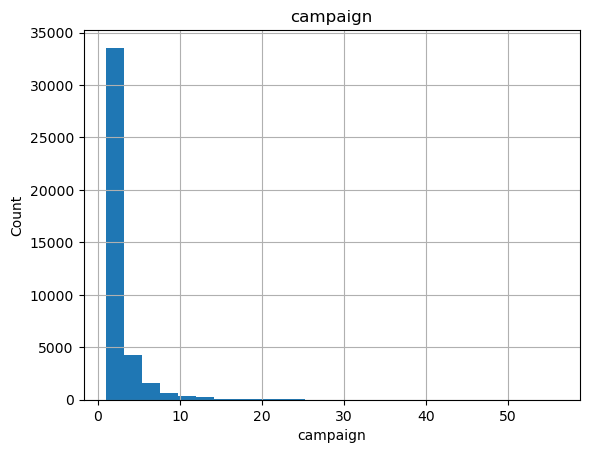

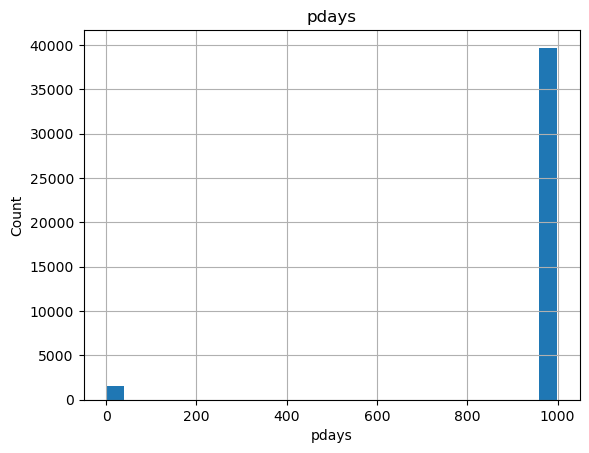

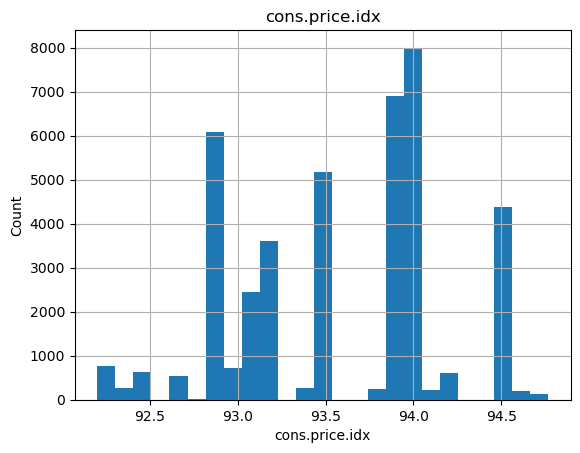

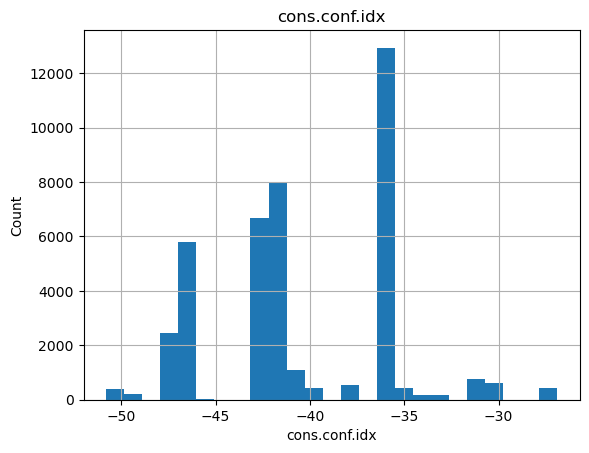

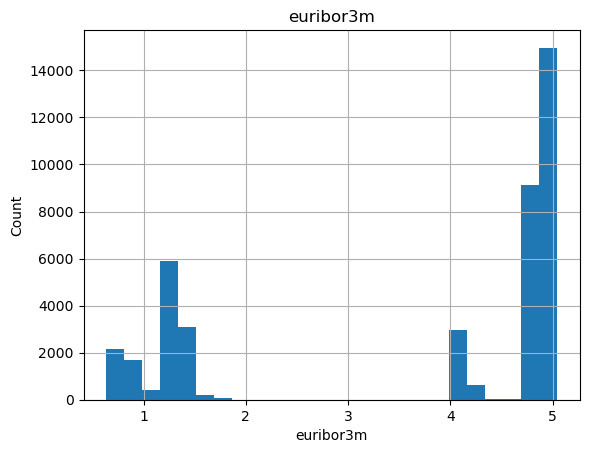

In [119]:
for feature in continuous_features:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

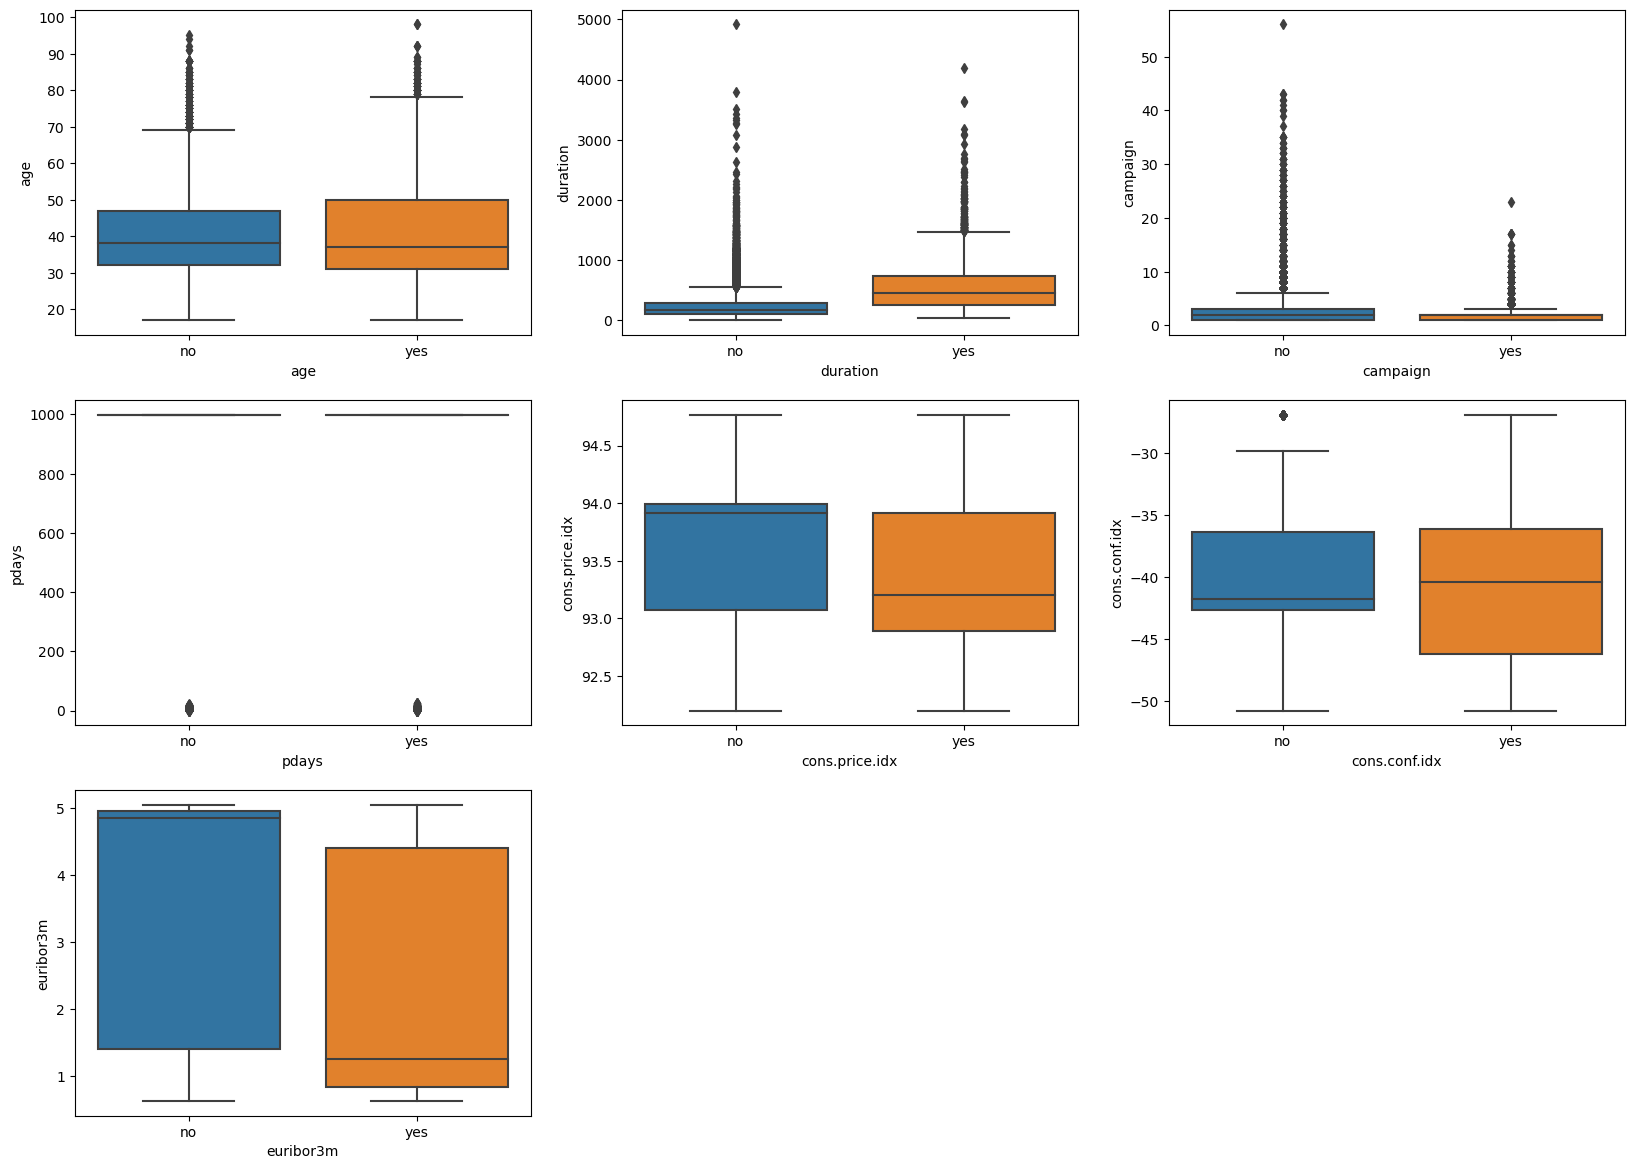

In [120]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=data[feature],data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


The correlation matrix shows how each numerical feature in the dataset is correlated with every other numerical feature. The values in the matrix range from -1 to 1.

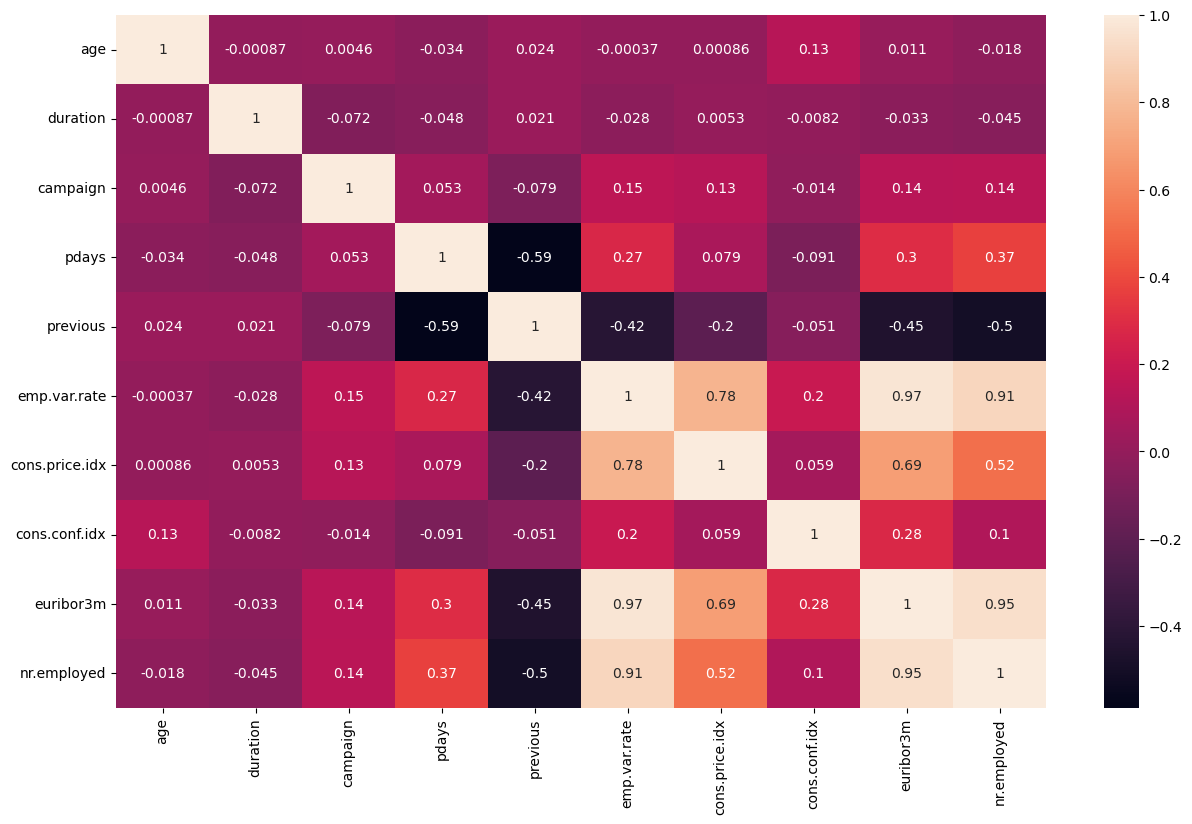

In [121]:
numeric_data = data.select_dtypes(include='number')
cor_mat = numeric_data.corr()

# Plot the heatmap
fig = plt.figure(figsize=(15, 9))
sns.heatmap(cor_mat, annot=True)
plt.show()


In [122]:
data['y'].groupby(data['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [123]:
data.shape

(41188, 21)

Encoding is neccessary for this given data because its having more categorical variables with non numerical da, since machine learning cant able to understand the numerical data, the encoding is needen here to convert categorical variables into a numerical format that machine learning algorithms can understand and process  the datas effectively.

In [124]:
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder

cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in cat_features:
    data[feature] = label_encoder.fit_transform(data[feature])

for feature in cat_features:
    print(f"Encoded values for '{feature}':")
    print(data[feature].unique())
    print()

data

Encoded values for 'job':
[ 3  7  0  1  9  5  4 10  6 11  2  8]

Encoded values for 'marital':
[1 2 0 3]

Encoded values for 'education':
[0 3 1 2 5 7 6 4]

Encoded values for 'default':
[0 1 2]

Encoded values for 'housing':
[0 2 1]

Encoded values for 'loan':
[0 2 1]

Encoded values for 'contact':
[1 0]

Encoded values for 'month':
[6 4 3 1 8 7 2 5 0 9]

Encoded values for 'day_of_week':
[1 3 4 2 0]

Encoded values for 'poutcome':
[1 0 2]



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,no
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4964,no
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,yes


In this problem im gonna predict whether the upcoming new customers will subscribe the product or not, for that i have to train and test a model using the given data, so the target variable is not needed here, it will learn and give the predictions for this data and if it almost same like the existing result, we can choose the best model. so, the target variable 'y' is dropped here.And the model is splitted into training and testing part.

In [125]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As from the given data plotted in the begining of the code it says that, its having around 88 percentage of 'No' and around 11 percentage of 'yes'. To balance this data, the SMOTE technique is used, it is expanded as Synthetic Minority Over-sampling Technique is a method used to address class imbalance in classification problems. Class imbalance occurs when one class (usually the minority class) is significantly underrepresented compared to the other class in the dataset. I gave two graphs, histogram and the pie chart to differentiate the original data and data after smote.

In [126]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Number of samples before SMOTE:", len(X_train))
print("Number of samples after SMOTE:", len(X_train_balanced))

Number of samples before SMOTE: 32950
Number of samples after SMOTE: 58490


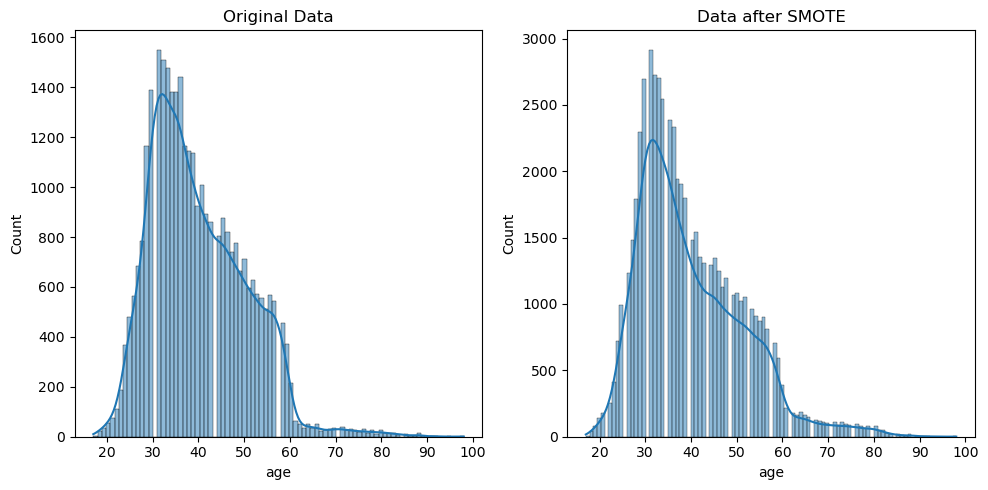

In [127]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['age'], kde=True)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.histplot(X_train_balanced['age'], kde=True)
plt.title('Data after SMOTE')

plt.tight_layout()
plt.show()

Here in the below pie chart it clearly states that, the data in balanced after smote.

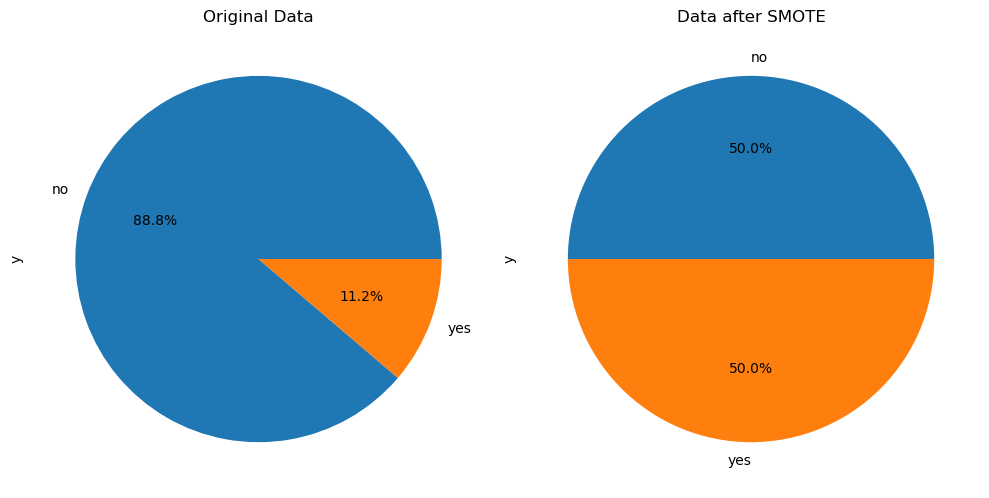

In [128]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Original Data')

# Plot data after SMOTE
plt.subplot(1, 2, 2)
y_train_balanced.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Data after SMOTE')

plt.tight_layout()
plt.show()

Scaling is a crucial preprocessing step in many machine learning algorithms, particularly those that use distance-based metrics or gradient descent optimization. Here's why scaling is needed, Scaling ensures that all features contribute equally to the model fitting process. Without scaling, features with larger scales (e.g., larger range of values) may dominate over features with smaller scales, leading to biased model training.

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

Now the randomforest classifier is classifying the data using the X trained balnced scaled data and the y trained balanced data and doing the predictions with the help of the X test scaled. and the classification report is printed.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_balanced_scaled, y_train_balanced)
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

# Print the classification report
print("Classification Report for Random Forest:")
print(report_rf)

Random Forest Accuracy: 0.9055596018451081
Classification Report for Random Forest:
              precision    recall  f1-score   support

          no       0.95      0.94      0.95      7303
         yes       0.57      0.65      0.61       935

    accuracy                           0.91      8238
   macro avg       0.76      0.79      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[6854  449]
 [ 329  606]]


Even though we got good accuracy from the random classifier, that's not enough(good) for the given dataset. so the hyperparameter tunning is done to update the n_estimators, max_depth, the minimum number of samples required to split an internal node (min_samples_split), and others using the ensemble learning technique that usually combine more weakenn decision trees together to give a god result and gained more accuracy than the above.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
Best Score: 0.9402120020516328
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.07      0.14      7303
         yes       0.12      0.97      0.21       935

    accuracy                           0.17      8238
   macro avg       0.53      0.52      0.17      8238
weighted avg       0.85      0.17      0.14      8238

Confusion Matrix:
[[ 531 6772]
 [  31  904]]


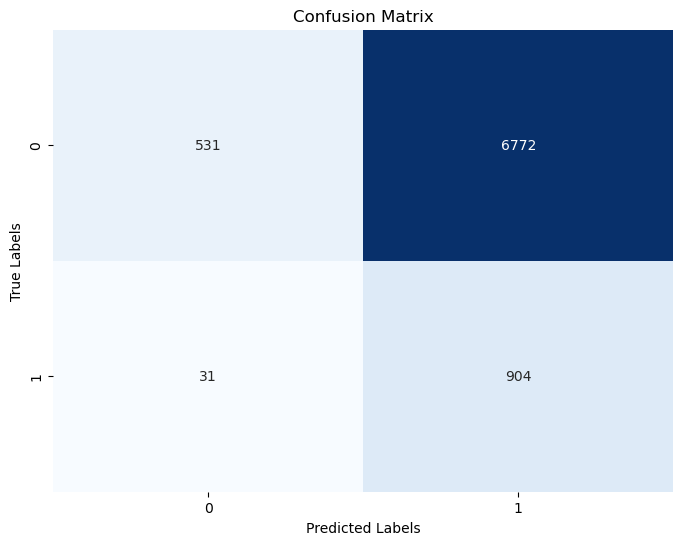

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_balanced_scaled, y_train_balanced)
best_rf = grid_search_rf.best_estimator_
y_hp_pred_rf = best_rf.predict(X_test)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

# Generate classification report
class_report_hp_rf = classification_report(y_test, y_hp_pred_rf)
print("Classification Report:")
print(class_report_hp_rf)

# Generate confusion matrix
conf_hp_matrix_rf = confusion_matrix(y_test, y_hp_pred_rf)
print("Confusion Matrix:")
print(conf_hp_matrix_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_hp_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Gradient Boosting is a popular ensemble learning technique used for classification and regression tasks. It works by combining multiple weak learning decision trees to create a strong predictive model. The idea behind Gradient Boosting is to sequentially train new models to correct the errors made by the previous models, focusing on the instances that were misclassified or had large residuals.

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train_balanced_scaled, y_train_balanced)
y_pred_gbm = gbm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbm)

Gradient Boosting Classifier Accuracy: 0.8863801893663511


In [131]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_gb = confusion_matrix(y_test, y_pred_gbm)
print(conf_matrix_gb)

report_gb = classification_report(y_test, y_pred_gbm)

# Print the classification report
print("Classification Report for Random Forest:")
print(report_gb)

[[6544  759]
 [ 177  758]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

          no       0.97      0.90      0.93      7303
         yes       0.50      0.81      0.62       935

    accuracy                           0.89      8238
   macro avg       0.74      0.85      0.78      8238
weighted avg       0.92      0.89      0.90      8238



Hyperparameter tunning control the behavior of the Gradient Boosting algorithm and can significantly impact its performance. Tuning hyperparameters allows us to find the optimal combination of settings that maximize the model's performance metrics, such as accuracy, precision, recall, or F1-score.the accuracy has increased for this after the hyperparameter tunning process.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1}
Best Score: 0.9017951786630192
Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.69      0.77      7303
         yes       0.08      0.22      0.12       935

    accuracy                           0.64      8238
   macro avg       0.48      0.46      0.45      8238
weighted avg       0.78      0.64      0.70      8238

Confusion Matrix:
[[5063 2240]
 [ 728  207]]


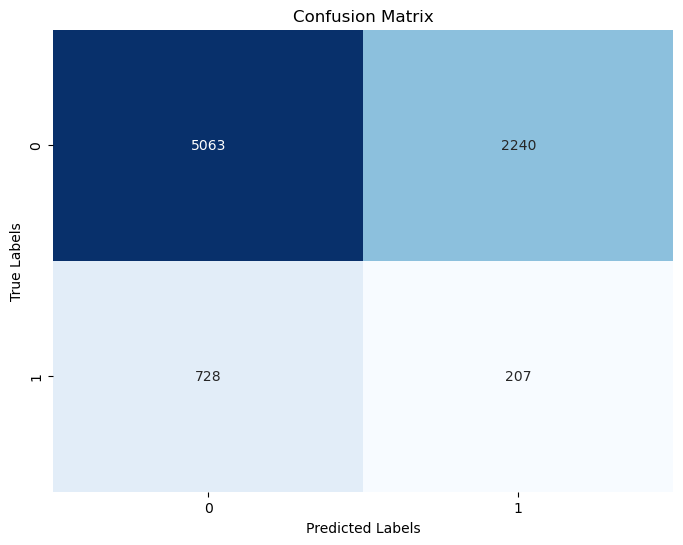

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [1,1,1],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_balanced_scaled, y_train_balanced)
best_gb = grid_search_gb.best_estimator_
y_hp_pred_gb = best_gb.predict(X_test)


print("Best Parameters:", grid_search_gb.best_params_)
print("Best Score:", grid_search_gb.best_score_)

# Generate classification report
class_report_hp_gb = classification_report(y_test, y_hp_pred_gb)
print("Classification Report:")
print(class_report_hp_gb)

# Generate confusion matrix
conf_hp_matrix_gb = confusion_matrix(y_test, y_hp_pred_gb)
print("Confusion Matrix:")
print(conf_hp_matrix_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_hp_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



At last, for finding the best model, the classification report for both the classifiers(models) after hyperparameter tunning is given to the if clause. and according to the classification report based on the accuracy, f1 score, precision, recall values the if cluase will choose the best methos which is having highest values of parameters.

In [133]:
print("Random Forest Accuracy after hyperparameter tunning :", class_report_hp_rf)
print("Gradient Boosting Accuracy after hyperparameter tunning :", class_report_hp_gb)

# Find the best model
if class_report_hp_rf > class_report_hp_gb:
    print("Random Forest is the best model.")
elif class_report_hp_rf < class_report_hp_gb:
    print("Gradient Boosting is the best model.")
else:
    print("Both Random Forest and Gradient Boosting have the same accuracy.")

Random Forest Accuracy after hyperparameter tunning :               precision    recall  f1-score   support

          no       0.94      0.07      0.14      7303
         yes       0.12      0.97      0.21       935

    accuracy                           0.17      8238
   macro avg       0.53      0.52      0.17      8238
weighted avg       0.85      0.17      0.14      8238

Gradient Boosting Accuracy after hyperparameter tunning :               precision    recall  f1-score   support

          no       0.87      0.69      0.77      7303
         yes       0.08      0.22      0.12       935

    accuracy                           0.64      8238
   macro avg       0.48      0.46      0.45      8238
weighted avg       0.78      0.64      0.70      8238

Random Forest is the best model.


From the below graph, it says that the **Random Classifier is best model** for the given data to predict whether the upcoming new customer will subscribe their product or not.

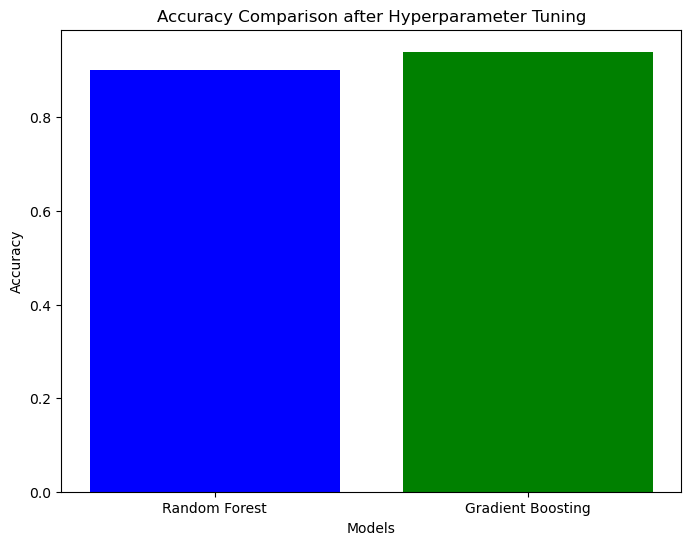

In [134]:
accuracies = [grid_search_gb.best_score_, grid_search_rf.best_score_]
models = ['Random Forest', 'Gradient Boosting']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison after Hyperparameter Tuning')
plt.show()

The plotting of the Target varible is given below to show how many people says 'Yes' and 'No' according to Random Forest Classifier based on the classification report (Accuracy, F1-Score, Recall, Precision). I Plotted the Random Forest classifier since it is best model according to the code.

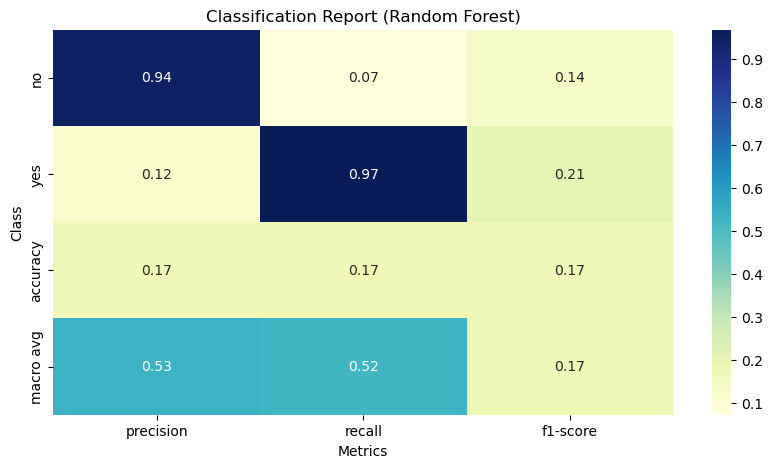

In [135]:
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
report = classification_report(y_test, y_hp_pred_rf, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :3], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report (Random Forest)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


Breiman, L. (2001) 'Leo Breiman,' Random Forest., 45(1), pp. 5–32. https://doi.org/10.1023/a:1010933404324.

Guo, C. and Berkhahn, F. (2016) 'Entity embeddings of categorical variables,' arXiv (Cornell University). https://doi.org/10.48550/arxiv.1604.06737.

He, H. and Garcia, E.A. (2009) 'Learning from Imbalanced Data,' IEEE Transactions on Knowledge and Data Engineering, 21(9), pp. 1263–1284. https://doi.org/10.1109/tkde.2008.239.

Natekin, A. and Knoll, A. (2013) 'Gradient boosting machines, a tutorial,' Frontiers in Neurorobotics, 7. https://doi.org/10.3389/fnbot.2013.00021.

Sandha, S.S. et al. (2021) 'Enabling hyperparameter tuning of machine learning classifiers in production,' IEEE. https://doi.org/10.1109/cogmi52975.2021.00041.